In [1]:
# ***********************************************************
# SCAN ON EP TEMPERATURE: DIRECT and MPR DIAGNOSTIC
# ***********************************************************

In [1]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib notebook

In [2]:
run main_NLED31213

<IPython.core.display.Javascript object>


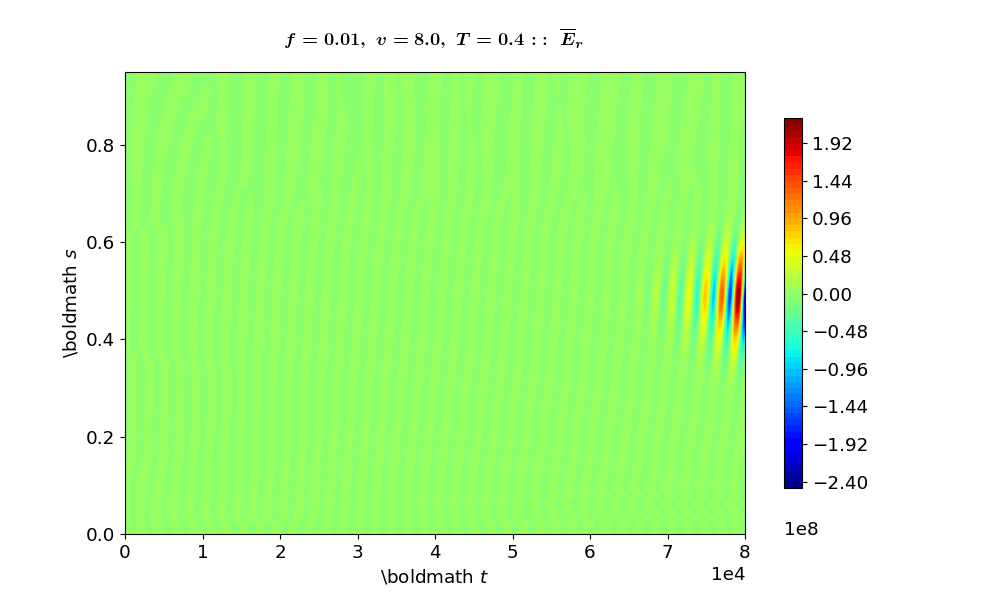

<IPython.core.display.Javascript object>


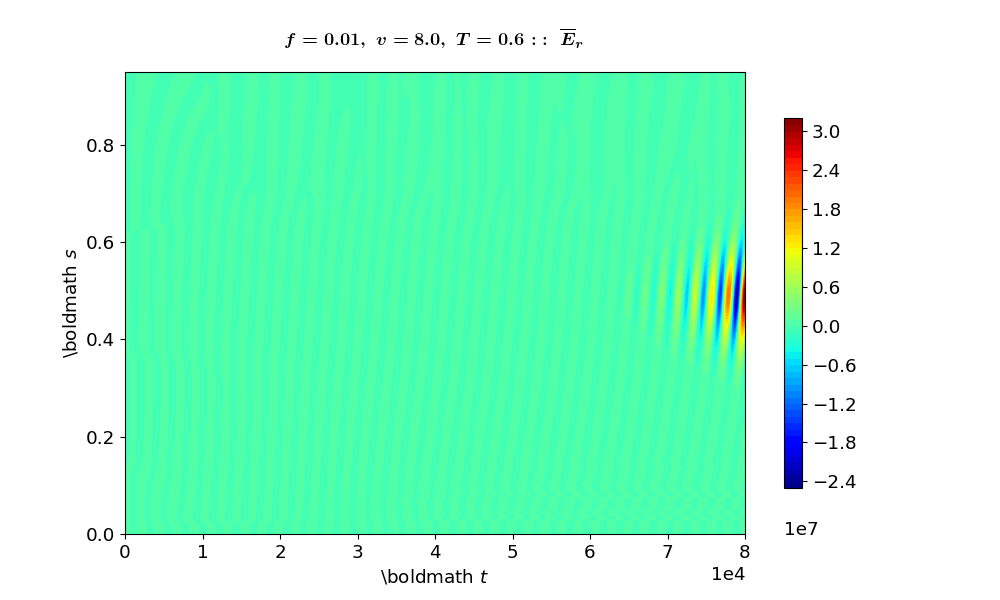

<IPython.core.display.Javascript object>


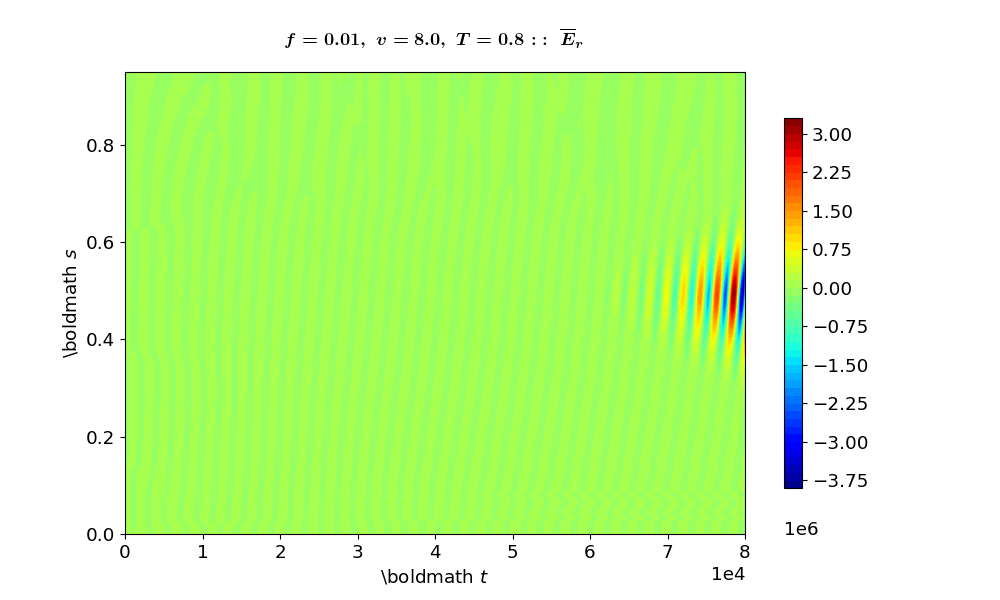

In [9]:
# *******************
# *** PLOT: (t,s) ***
# *******************
reload()

npr = 3

oo_ts = {
    'ovars': [
        ['zonal', 'erbar'], 
    ] * npr,
    'avrs': [
        ['ts']
    ] * npr,
    'dds': [b025_v80_T04, b025_v80_T06, b025_v80_T08],
#     'var_legs1': ['f = 0.01'],
}

oo_ts.update({
#      't_start': 6e4,
#     't_end': 6.3e4,
#      's_start': 0.4, 's_end': 0.7,
})

common.plot_vars_2d(oo_ts)

<IPython.core.display.Javascript object>


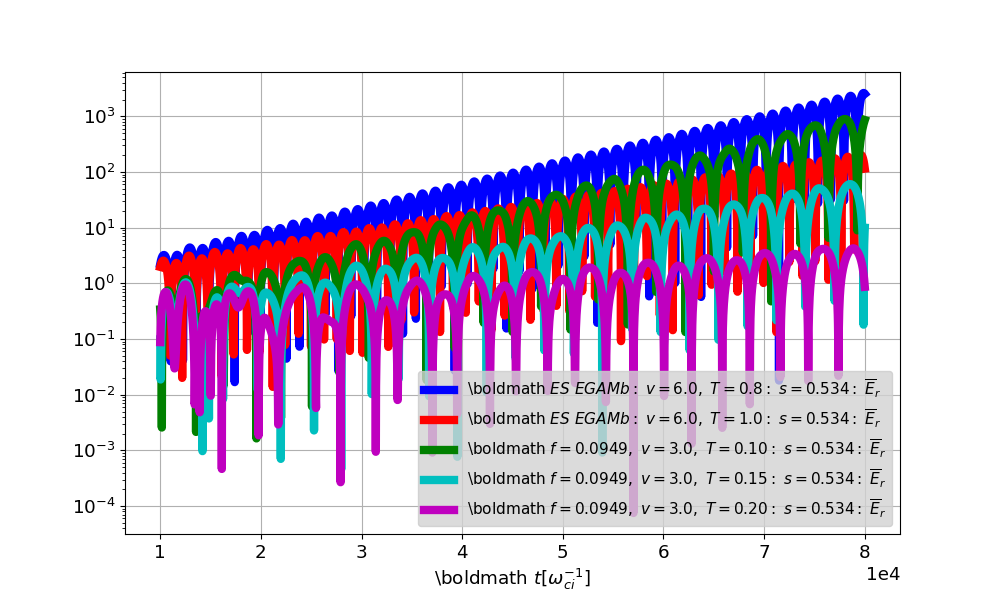

In [16]:
# ***********************
# *** PLOT: (t) at s1 ***
# ***********************
reload()

npr = 5
# s1 = 0.50
# s1 = 0.55
s1 = 0.53  # for v = 3.0

oo_t_s1 = {
    'ovars': [
        ['zonal', 'erbar'],
    ]*npr,
    'avrs': [
        ['ts', 'point-s', [s1]],
    ]*npr,
#     'dds': [b025_v6_T04, b025_v6_T06, b025_v6_T08, b025_v6_T1],
    'dds': [b025_v6_T08, b025_v6_T1, b025_v3_T01, b025_v3_T015, b025_v3_T02],
    'flag_semilogy': True,
    'stys': ['-', '-', '-', '-'],
    'labx': 't[\omega_{ci}^{-1}]',
#     'var_legs1': ['f = 0.05'],
#     'var_legs2': ['dt=10'],
#     'var_legs3': ['dt=20'],
    'x_start': 1e4, 
#     'x_end': 4.3e4,
}
common.plot_vars_1d(oo_t_s1)

<IPython.core.display.Javascript object>


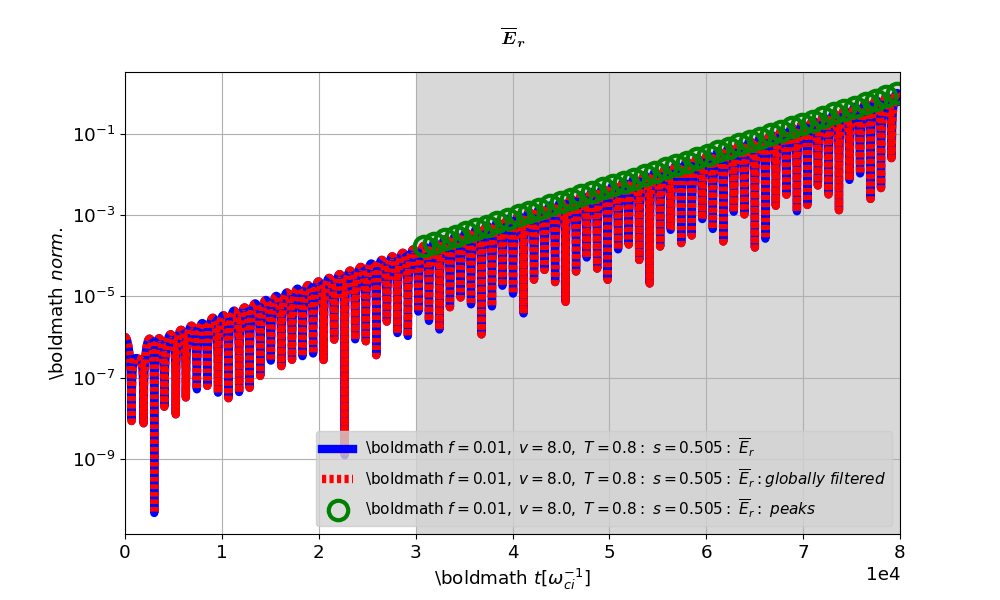

<IPython.core.display.Javascript object>


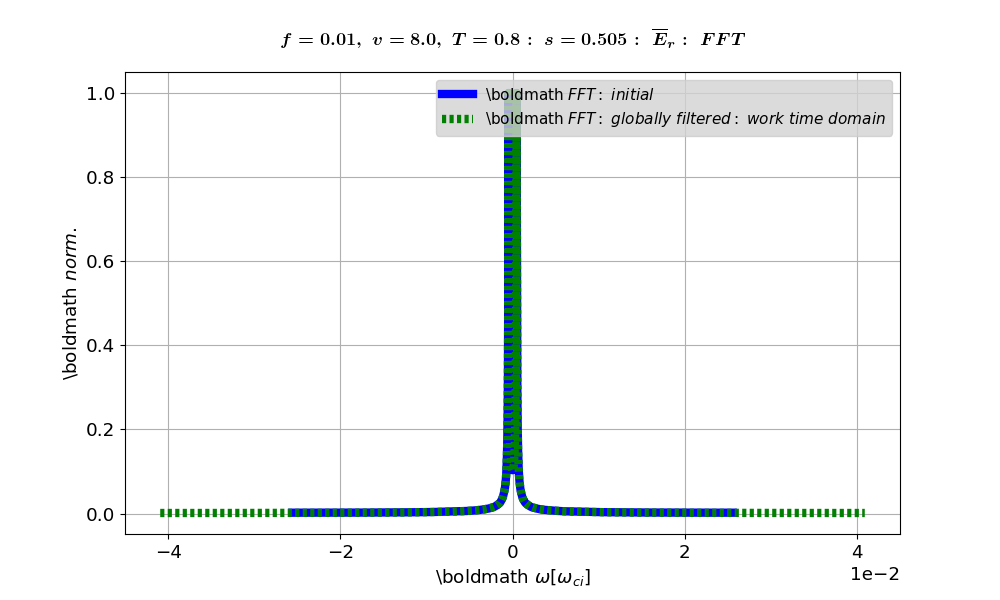

<IPython.core.display.Javascript object>


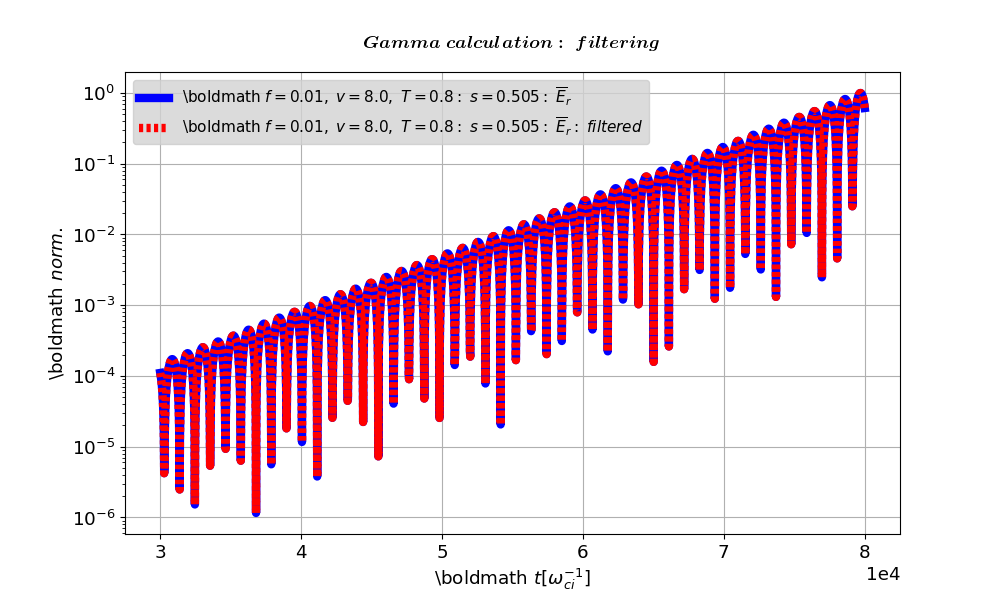

<IPython.core.display.Javascript object>


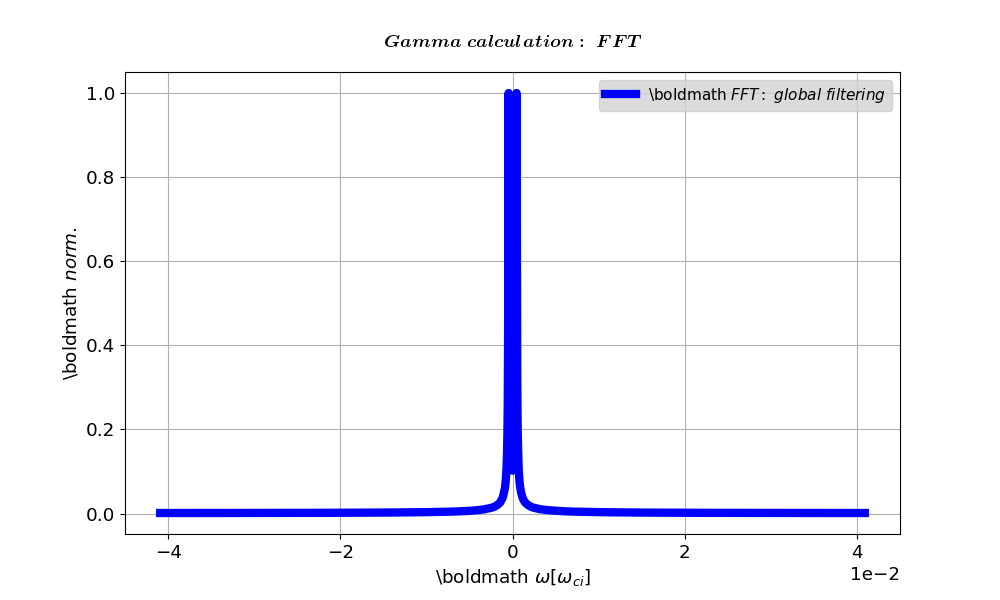

<IPython.core.display.Javascript object>


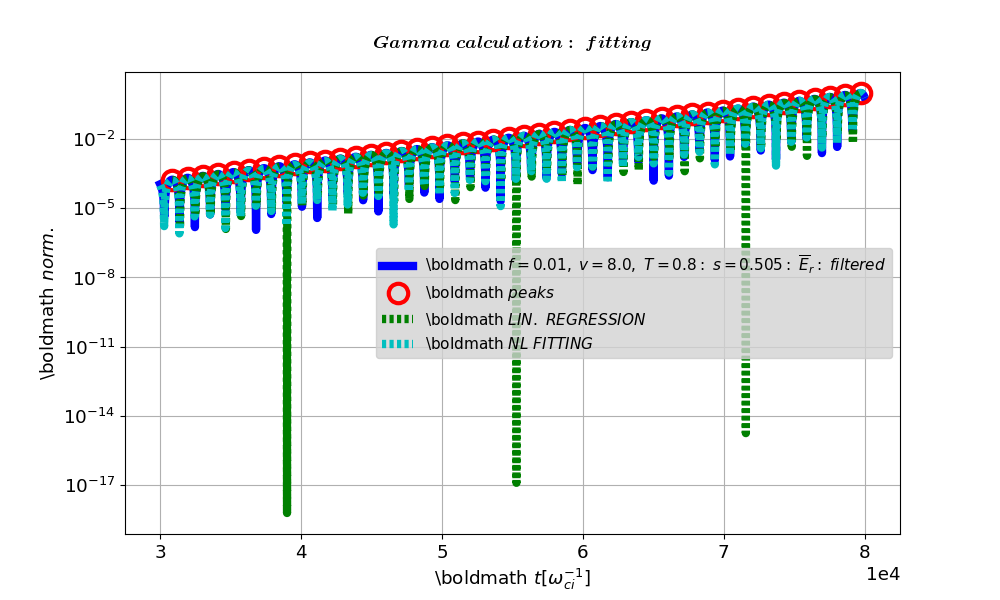

<IPython.core.display.Javascript object>


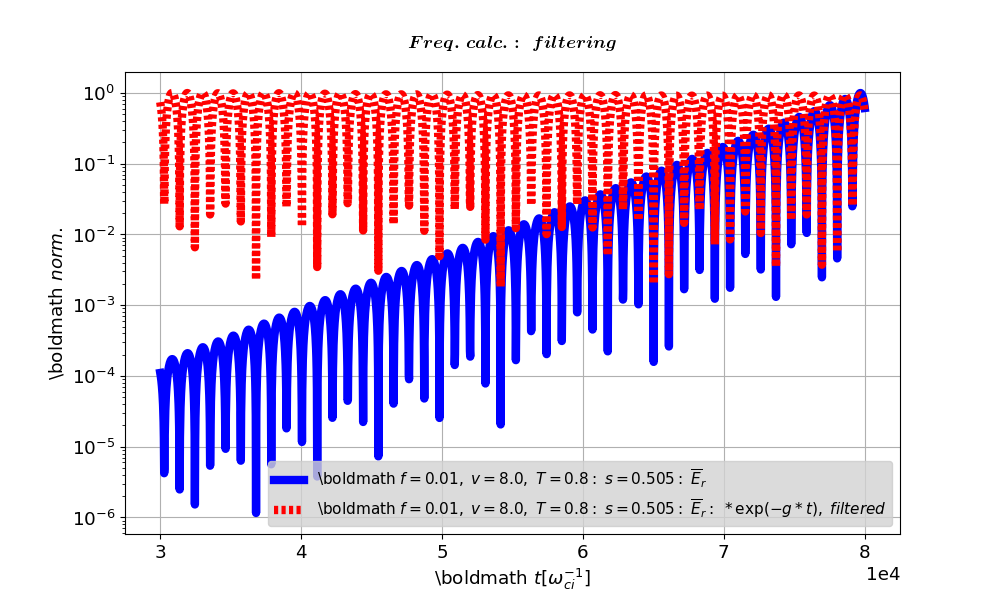

<IPython.core.display.Javascript object>


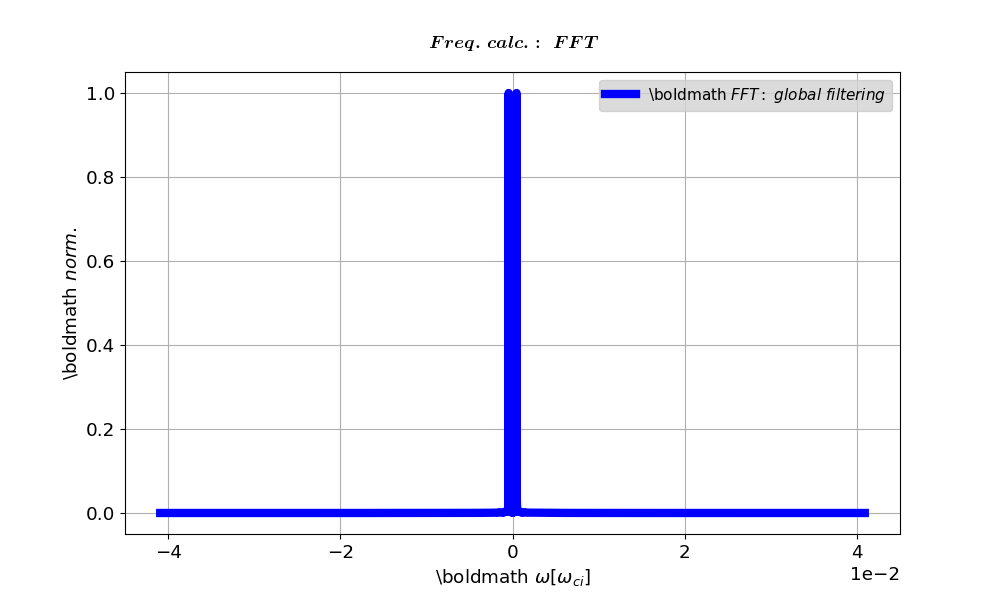

<IPython.core.display.Javascript object>


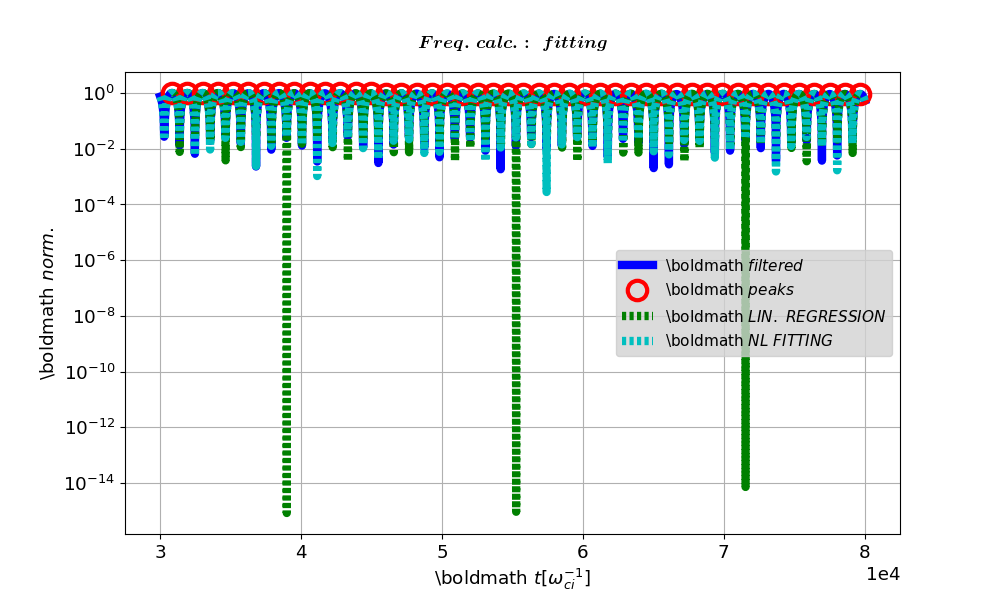

--- NAIVE CALCULATION ---
- GAMMA: ESTIMATION -
prel. w[wci] = 2.895e-03
g[wci] = 1.771e-04 +- 3.143e-07
- GAMMA: NL FITTING -
prel. w[wci] = 2.894e-03 +- 6.712e-08
g[wci] = 1.789e-04 +- 6.372e-08
- FREQUENCY: ESTIMATION -
w[wci] = 2.895e-03
(g_real - g_num)[wci] = -1.860e-06 +- 2.776e-07
- FREQUENCY: NL FITTING -
w[wci] = 2.895e-03 +- 3.738e-08
(g_real - g_num)[wci] = -1.883e-06 +- 3.743e-08
All chosen time intervals are unique.


<IPython.core.display.Javascript object>


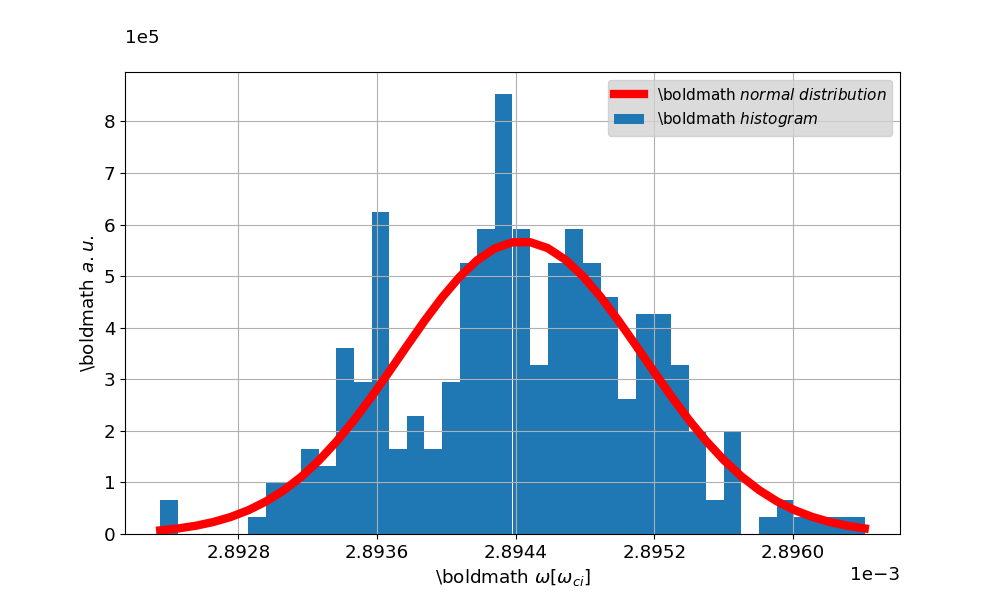

<IPython.core.display.Javascript object>


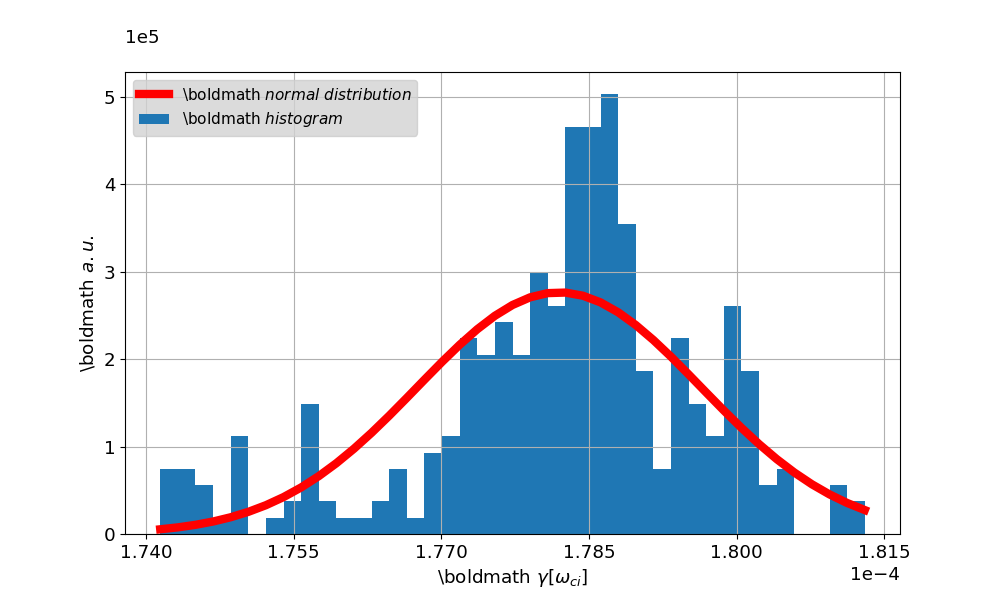

--- STATISTICS ---
number of frequency samples = 300
number of rate samples = 300
w[wci] = 2.894e-03+-1.379e-06
g[wci] = 1.782e-04+-2.830e-06


{'naive': {'w_est': 0.0028945878257891217,
  'g_est': 0.00017705509518216932,
  'w_adv': 0.002894671477360835,
  'g_adv': 0.00017891826052230156},
 'stat': {'w': 0.00289443347329971,
  'err_w': 1.3785755587965554e-06,
  'g': 0.00017819719366276237,
  'err_g': 2.830299453799746e-06}}

In [14]:
# ***********************************************************
# *** ES SIM: DIRECT METHOD: FIND FRQUENCY and GAMMA (s1) ***
# ***********************************************************
reload()

s1 = 0.50  # for v = 8.0
# s1 = 0.55  # for v = 6.0
# s1 = 0.53  # for v = 3.0, 3.5

# dd_current = dict(b025_v3_T01)
# dd_current = dict(b025_v3_T015)
# dd_current = dict(b025_v3_T02)

# dd_current = dict(b025_T02_v35)

# dd_current = dict(b025_f0004)
# dd_current = dict(b025_v6_T1)

dd_current = dict(b025_v80_T08)

tmin, tmax = 3e4, 8e4 
filt_global = None
min_n_peaks, threshold_w, threshold_g = 8, 0.1, 0.1
n_samples = 300
sel_norm = 'wc'

oo_var = {
    'ovars': [['zonal', 'erbar']],
    'avrs': [['ts', 'point-s', [s1]]],
    'dds': [dd_current],
#     'sel_legs1': 'woPr',
}

oo_wg = {
    # BASIC
    't_work': [tmin, tmax], 
    'flag_two_stages': True,
#     'sel_norm': 'vt',
    # FILTERING
    'filt_global': filt_global,
    # STATISTICS
    'flag_stat':   True,
    'n_samples':   n_samples,
    'min_n_peaks': min_n_peaks,
    'threshold_w': threshold_w,
    'threshold_g': threshold_g,
    'sel_norm': sel_norm,
}

oo_plot = {
#     't_plot': [0.15e4, 1.5e4],
    'flag_norm': True,
    'flag_semilogy': True
}

common.calc_wg(oo_var, oo_wg, oo_plot)

<IPython.core.display.Javascript object>


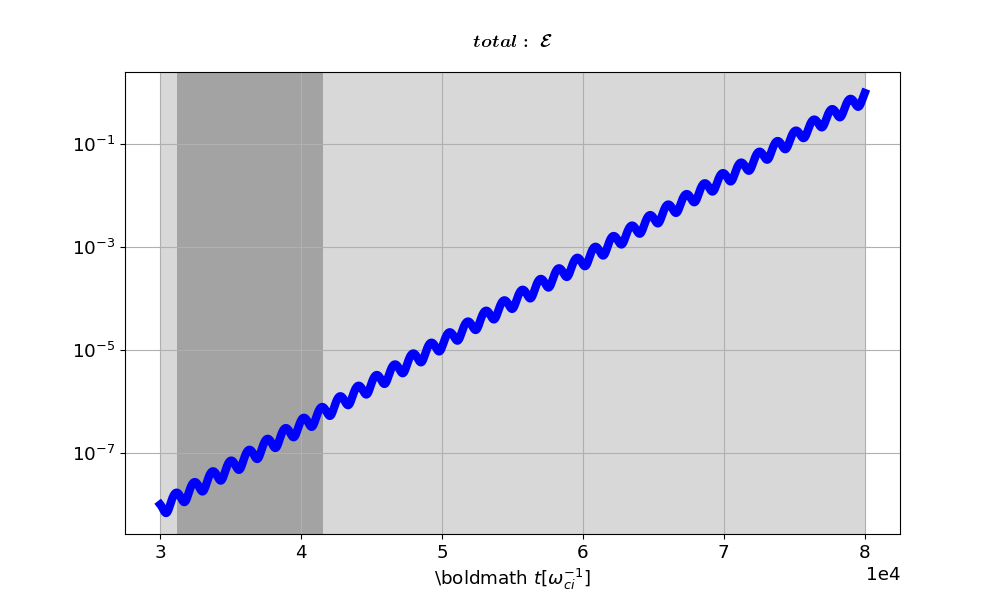

<IPython.core.display.Javascript object>


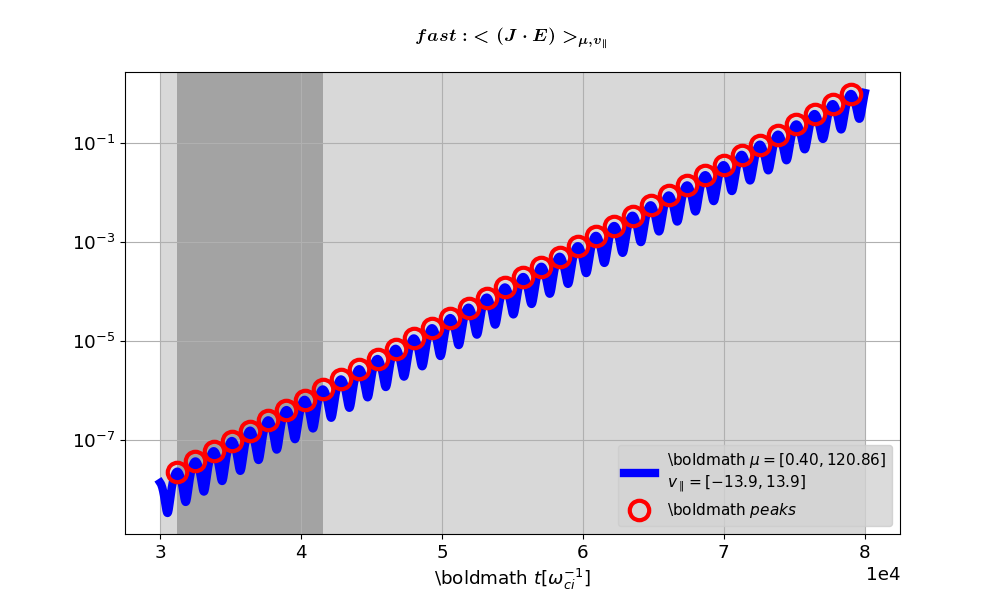

All chosen time intervals are unique.


<IPython.core.display.Javascript object>


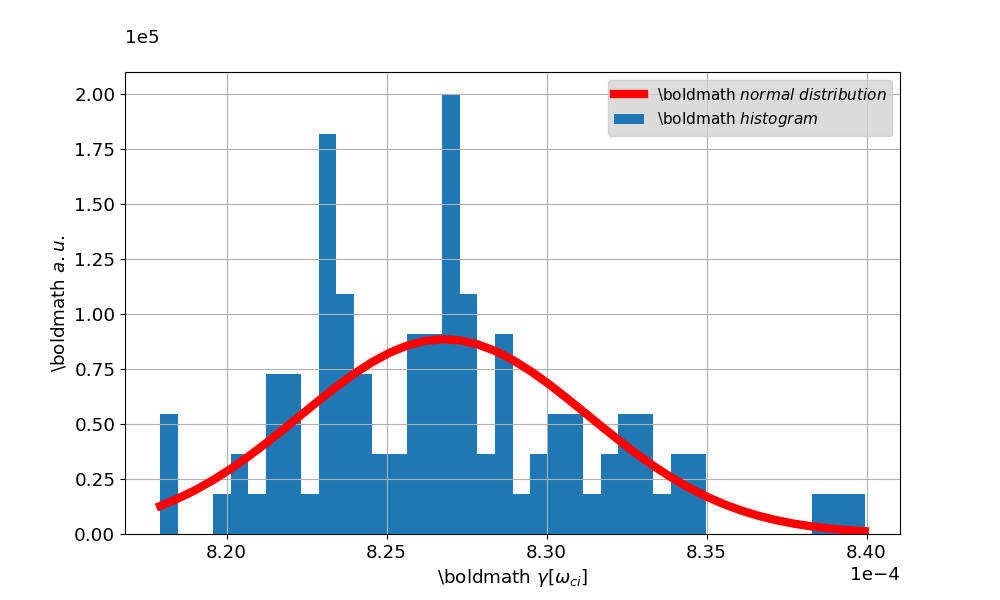

velocity domain: \mu = [0.40, 120.86]$
$ v_{\parallel} = [-13.9, 13.9]
fast: Initial: g[wci] = 8.417e-04
fast: Statistics: g[wci] = 8.268e-04+-8.838e-06



In [47]:
# ********************
# *** ES EGAM: MPR ***
# ********************
reload()

# species_name, flag_inv_peaks = 'total', True
# species_name, flag_inv_peaks = 'deuterium', False
species_name, flag_inv_peaks = 'fast', True

# dd_current, gam_w = dict(b025_v6_T04), 2.438e-03
# dd_current, gam_w = dict(b025_v3_T02), 1.082e-03
# dd_current, gam_w = dict(b025_f0004), 2.978e-03

dd_current, gam_w = dict(b025_v6_T04), 2.431e-03
# dd_current, gam_w = dict(b025_v6_T06), 2.431e-03
# dd_current, gam_w = dict(b025_v6_T08), 2.434e-03
# dd_current, gam_w = dict(b025_v6_T1), 2.441e-03

tmin, tmax = 3.0e4, 8.0e4
n_samples, min_gam_n_periods = 100, 3
filt_je = None
filt_ef = None
filt_er = None

oo_vars = {
    'sel_species': species_name,
}

oo_wg = {
    't_work': [tmin, tmax],
    'flag_naive_t_peaks': True,
    'naive_n_periods': 4,
    'flag_inv_peaks': flag_inv_peaks,
    'gam-w': gam_w,  # normalization is always [wc]
    # calculate confidence intervals
    'flag_stat': True,
    'n_samples': n_samples,
    'min_gam_n_periods': min_gam_n_periods,
}

oo_plot = {
    't_plot': oo_wg['t_work'],
    'flag_norm': True,
    'flag_semilogy': True,
}

common.MPR_gamma(dd_current, oo_vars, oo_wg, oo_plot)

<IPython.core.display.Javascript object>


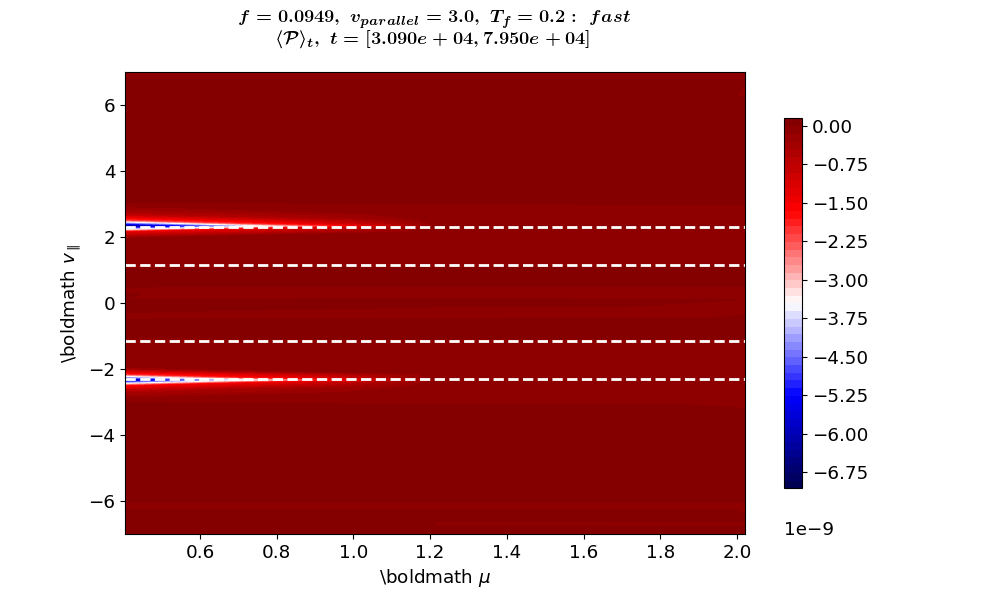

In [26]:
# ******************************
# *** ES EGAM: MPR: VELOCITY ***
# ******************************
reload()

# species_name, flag_inv_peaks = 'deuterium', False
species_name, flag_inv_peaks = 'fast', True

s1 = 0.50
# dd_current, gam_w, tit_proj = dict(b025_v6_T04), 2.438e-03, \
#     'ES\ EGAMb:\ \rho_{f} = 0.25,\ v_{parallel} = 6.0,\ T_f = 0.4:\ '
# dd_current, gam_w, tit_proj = dict(b025_v3_T02), 1.082e-03, \
#     'f = 0.0949,\ v_{parallel} = 3.0,\ T_f = 0.2:\ '
dd_current, gam_w, tit_proj = dict(b025_f0004), 2.978e-03, \
    'f = 0.004,\ v_{parallel} = 8.0,\ T_f = 1.0:\ '

# t_int_start, t_int_end = 3.12e4, 3.90e4 
t_int_start, t_int_end = 3.09e4, 7.95e4 
tmin, tmax = 3e4, 8e4  
n_samples, min_gam_n_periods = 100, 3

n_vpar_res = 2
mu_plot, vpar_plot = [0, 2.5], [-7, 7]
tit_vmu = [
    tit_proj + species_name, '\langle\mathcal{P}\\rangle_{t},\ ' +  
    't = [{:0.3e}, {:0.3e}]'.format(t_int_start, t_int_end)
]

oo_wg = {
    # work and calculation time domain
    't_work': [tmin, tmax], 
    'flag_naive_t_peaks': False,
    'naive_n_periods': 4,
    'flag_inv_peaks': flag_inv_peaks,
    'gam-w': gam_w,  # normalization is always [wc]
    's1': s1,
    # calculate confidence intervals
    'flag_stat': False,
    'n_samples': n_samples,
    'min_gam_n_periods': min_gam_n_periods,
}
oo_plot = {
    't_plot': oo_wg['t_work'],
    'flag_norm': False,
    'flag_semilogy': True,
    'flag_pass_trap_cone': False,
    'mu_plot': mu_plot, 'vpar_plot': vpar_plot,
    'n_vpar_res' : n_vpar_res,
    'tit_vmu': tit_vmu,
}
oo_vars = {
    'sel_species': species_name,
    't_int': [t_int_start, t_int_end]
}

common.MPR_gamma_velocity_domains(dd_current, {}, oo_vars, oo_wg, oo_plot)

<IPython.core.display.Javascript object>


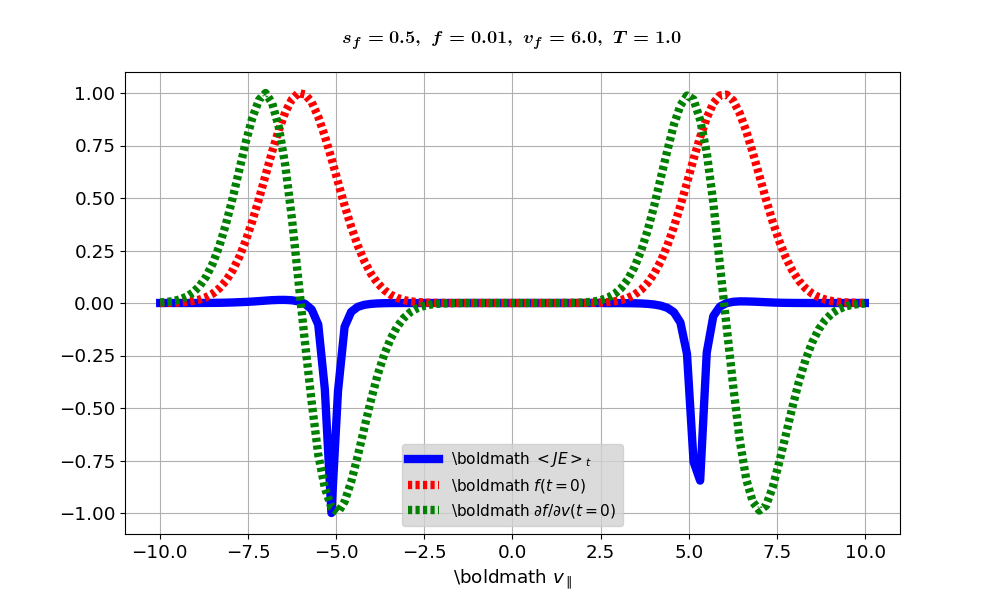

In [59]:
# **************************
# *** PLOT: <JE(vpar)>_t ***
# **************************
reload()

species_name = 'fast'

# dd_current, tit_plot = dict(b025_v6_T04), 's_f = 0.5,\ f = 0.01,\ v_f = 6.0,\ T = 0.4:\ ' + species_name
# dd_current, tit_plot = dict(b025_v6_T06), 's_f = 0.5,\ f = 0.01,\ v_f = 6.0,\ T = 0.6:\ ' + species_name
# dd_current, tit_plot = dict(b025_v6_T08), 's_f = 0.5,\ f = 0.01,\ v_f = 6.0,\ T = 0.8:\ ' + species_name
dd_current, tit_plot = dict(b025_v6_T1),  's_f = 0.5,\ f = 0.01,\ v_f = 6.0,\ T = 1.0:\ ' + species_name

t_av = [3.1e4, 7.9e4]

oo_vpar = {
    'ovars': [
        ['mpr',                    'je', species_name],
        ['distribution',     'f_vel_1d', species_name],
        ['distribution', 'df_vel_1d-dv', species_name],
    ],
    'avrs': [
        ['tvpar', 'mean-t', [t_av]],
        ['tvpar', 'point-t', [0.0]],
        ['tvpar', 'point-t', [0.0]],
    ],
    'dds': [dd_current]*3,
    'stys': ['-', ':', ':'],
    'labx': 'v_{\parallel}',
    'var_legs1': ['<JE>_t'],
    'var_legs2': ['f(t=0)'],
    'var_legs3': ['\partial f/\partial v (t=0)'],
#     'var_legs2': ['dt=10'],
#     'var_legs3': ['dt=20'],
     'x_start': -10, 'x_end': 10,
    'flag_norm': True,
    'tit_plot': tit_plot
}
common.plot_vars_1d(oo_vpar)

In [7]:
from ip_projects import NLED_scans

<IPython.core.display.Javascript object>


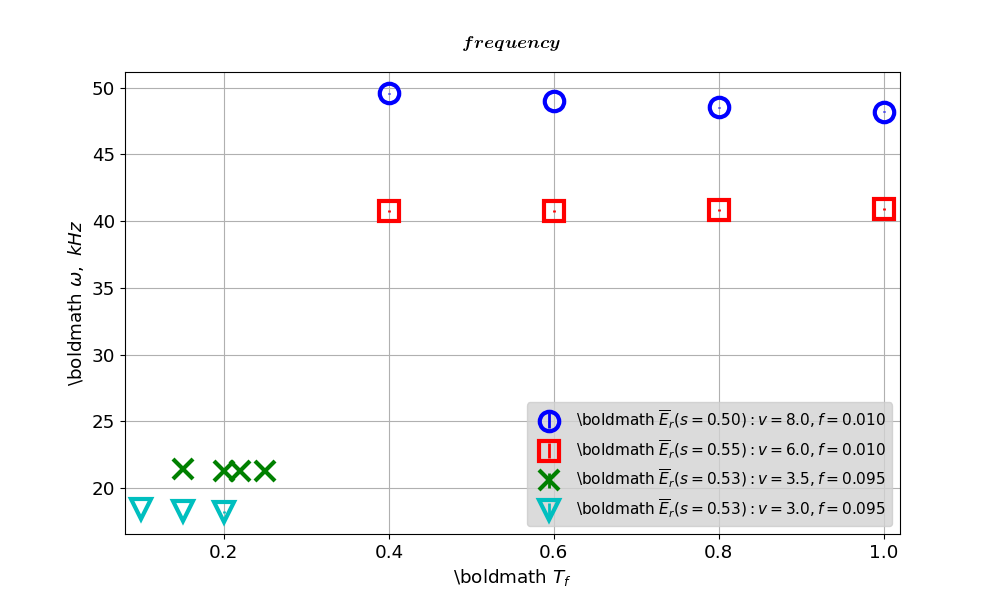

<IPython.core.display.Javascript object>


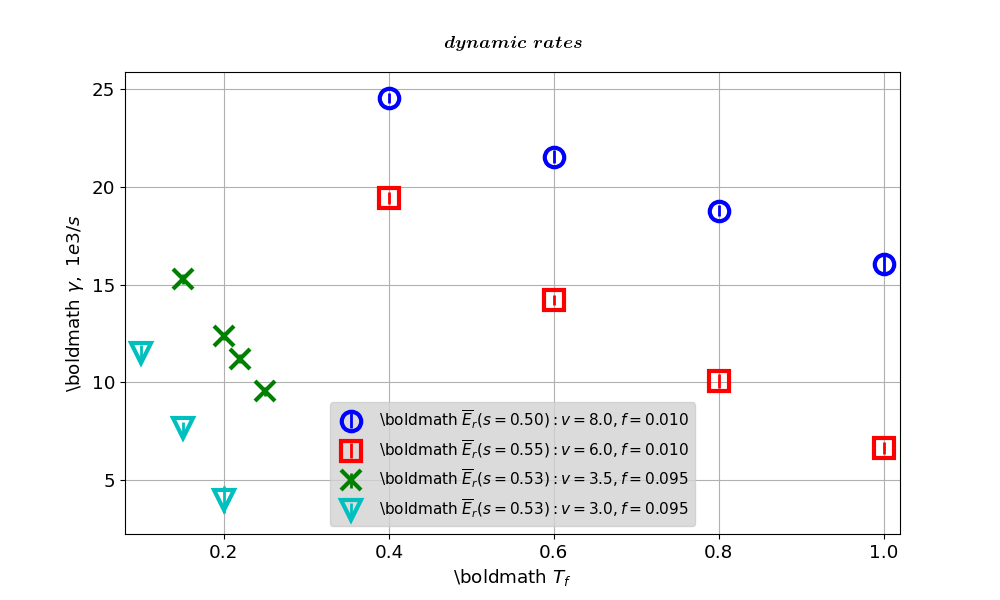

In [15]:
# **********************
# *** SCAN ON F_PART ***
# **********************
mix.reload_module(NLED_scans)
NLED_scans.es_egam_Tf_scan({'sel_norm': 'khz', 'dd': b025_v6_T1})